In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/Users/zainal.hameed/Downloads/webmd.csv')

# Exploratory Data Analysis

In [3]:
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [4]:
data.tail()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1
362805,45-54,Stop Smoking,11/12/2008,chantix,144470,4,5,"One year ago, I tried Chantix and had to stop ...",5,Female,"Nausea , headache , vomiting , drowsiness, g...",3


In [5]:
# Check the no of rows and columns
data.shape

(362806, 12)

In [6]:
#statistical summary of the dataset
data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [7]:
#overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [8]:
#check the column names
data.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

## Let us examine numerical features in the dataset 

In [9]:
data_numerical = data.select_dtypes(include=[int])
data_numerical.columns

Index(['DrugId', 'EaseofUse', 'Effectiveness', 'Satisfaction', 'UsefulCount'], dtype='object')

## Let us examine categorical features in the dataset 

In [10]:
data_categorical = data.select_dtypes(include=[object])

data_categorical.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'Reviews', 'Sex', 'Sides'], dtype='object')

### Adding Name & Race column

In [11]:
pip install mimesis

Note: you may need to restart the kernel to use updated packages.


In [12]:
from mimesis import Person

# Initialize the Person provider
person = Person('en')

# Function to create fake names for 'n' rows
def fake_names(n):
    names = [person.name() for _ in range(n)]
    return names

# Generate fake names for 362,806 rows
names = fake_names(362806)

# Create a DataFrame with the generated names
data_name = pd.DataFrame(names, columns=['Name'])

# Display the first few rows of the DataFrame
data_name.head()

,Name
0,Logan
1,Darby
2,Pok
3,Jenise
4,Merrill


In [13]:
import random

# Define the race options and their respective probabilities
options = [("White", 0.32), ("Hispanic", 0.28), ("Black", 0.22), ("Asian", 0.18)]

# Generate random race values for 362,806 rows
words = [random.choices([o[0] for o in options], [o[1] for o in options])[0] for _ in range(362806)]

# Create a DataFrame with the generated race values
data_race = pd.DataFrame(words, columns=['Race'])

# Display the first few rows of the DataFrame
data_race.head()

,Race
0,Black
1,Asian
2,Asian
3,White
4,White


In [14]:
data1 = pd.concat([data_name, data_race, data], axis=1).reindex(data.index)
data1.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,Logan,Black,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,Darby,Asian,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,Pok,Asian,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,Jenise,White,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,Merrill,White,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


### Missing Value Handling 

In [15]:
# check the null values
missing_values = data1.isna().sum()
print(missing_values)

Name              0
Race              0
Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64


In [16]:
# Nan rows were dropped
data1.dropna(axis = 0, inplace = True)
data1.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [17]:
data1.shape

(362769, 14)

### Checking each column values

In [18]:
data1['Sex'].value_counts()

Female    238203
Male       98033
           26533
Name: Sex, dtype: int64

In [19]:
data1['Age'].value_counts()

45-54         80032
55-64         75129
35-44         55010
25-34         49705
65-74         41215
19-24         24230
75 or over    15225
              12199
13-18          7045
7-12           1644
3-6             838
0-2             497
Name: Age, dtype: int64

In [20]:
data1['Drug'].unique().tolist()

['25dph-7.5peh',
 'warfarin (bulk) 100 % powder',
 'wymzya fe',
 '12 hour nasal relief spray, non-aerosol',
 'pyrogallol crystals',
 'lyza',
 'lysiplex plus liquid',
 'lysteda',
 'pyrithione zinc shampoo',
 'lysine acetate 4,000 mg oral powder packet',
 'lynparza tablet',
 'lynparza',
 'lymphazurin vial',
 'lyrica',
 'lysodren',
 'lydia pinkham herbal',
 'pyrithione zinc bar',
 'lycopene',
 'pyrilamine-chlophedianol liquid',
 'pyrilamine maleate powder',
 'pyridoxine hcl',
 'pyridostigmine bromide solution',
 'pyridostigmine bromide',
 'pyridostigmine bromide (bulk) 100 % powder',
 'pyrethrins-piperonyl butoxide shampoo',
 'pyrantel pamoate suspension',
 'pyrazinamide',
 'pyridium',
 'pylera',
 'luxiq foam',
 'luxamend cream',
 'lmx 5 cream',
 'lmx 4 cream',
 'loestrin',
 'lo-zumandimine (28) 3 mg-0.02 mg tablet contraceptives',
 'loxapine',
 'low-ogestrel',
 'low dose aspirin ec',
 'lovenox syringe',
 'lovaza',
 'lovastatin tablet, extended release 24 hr',
 'lovastatin',
 'loutrex cre

In [21]:
data1['Drug'].nunique()

7093

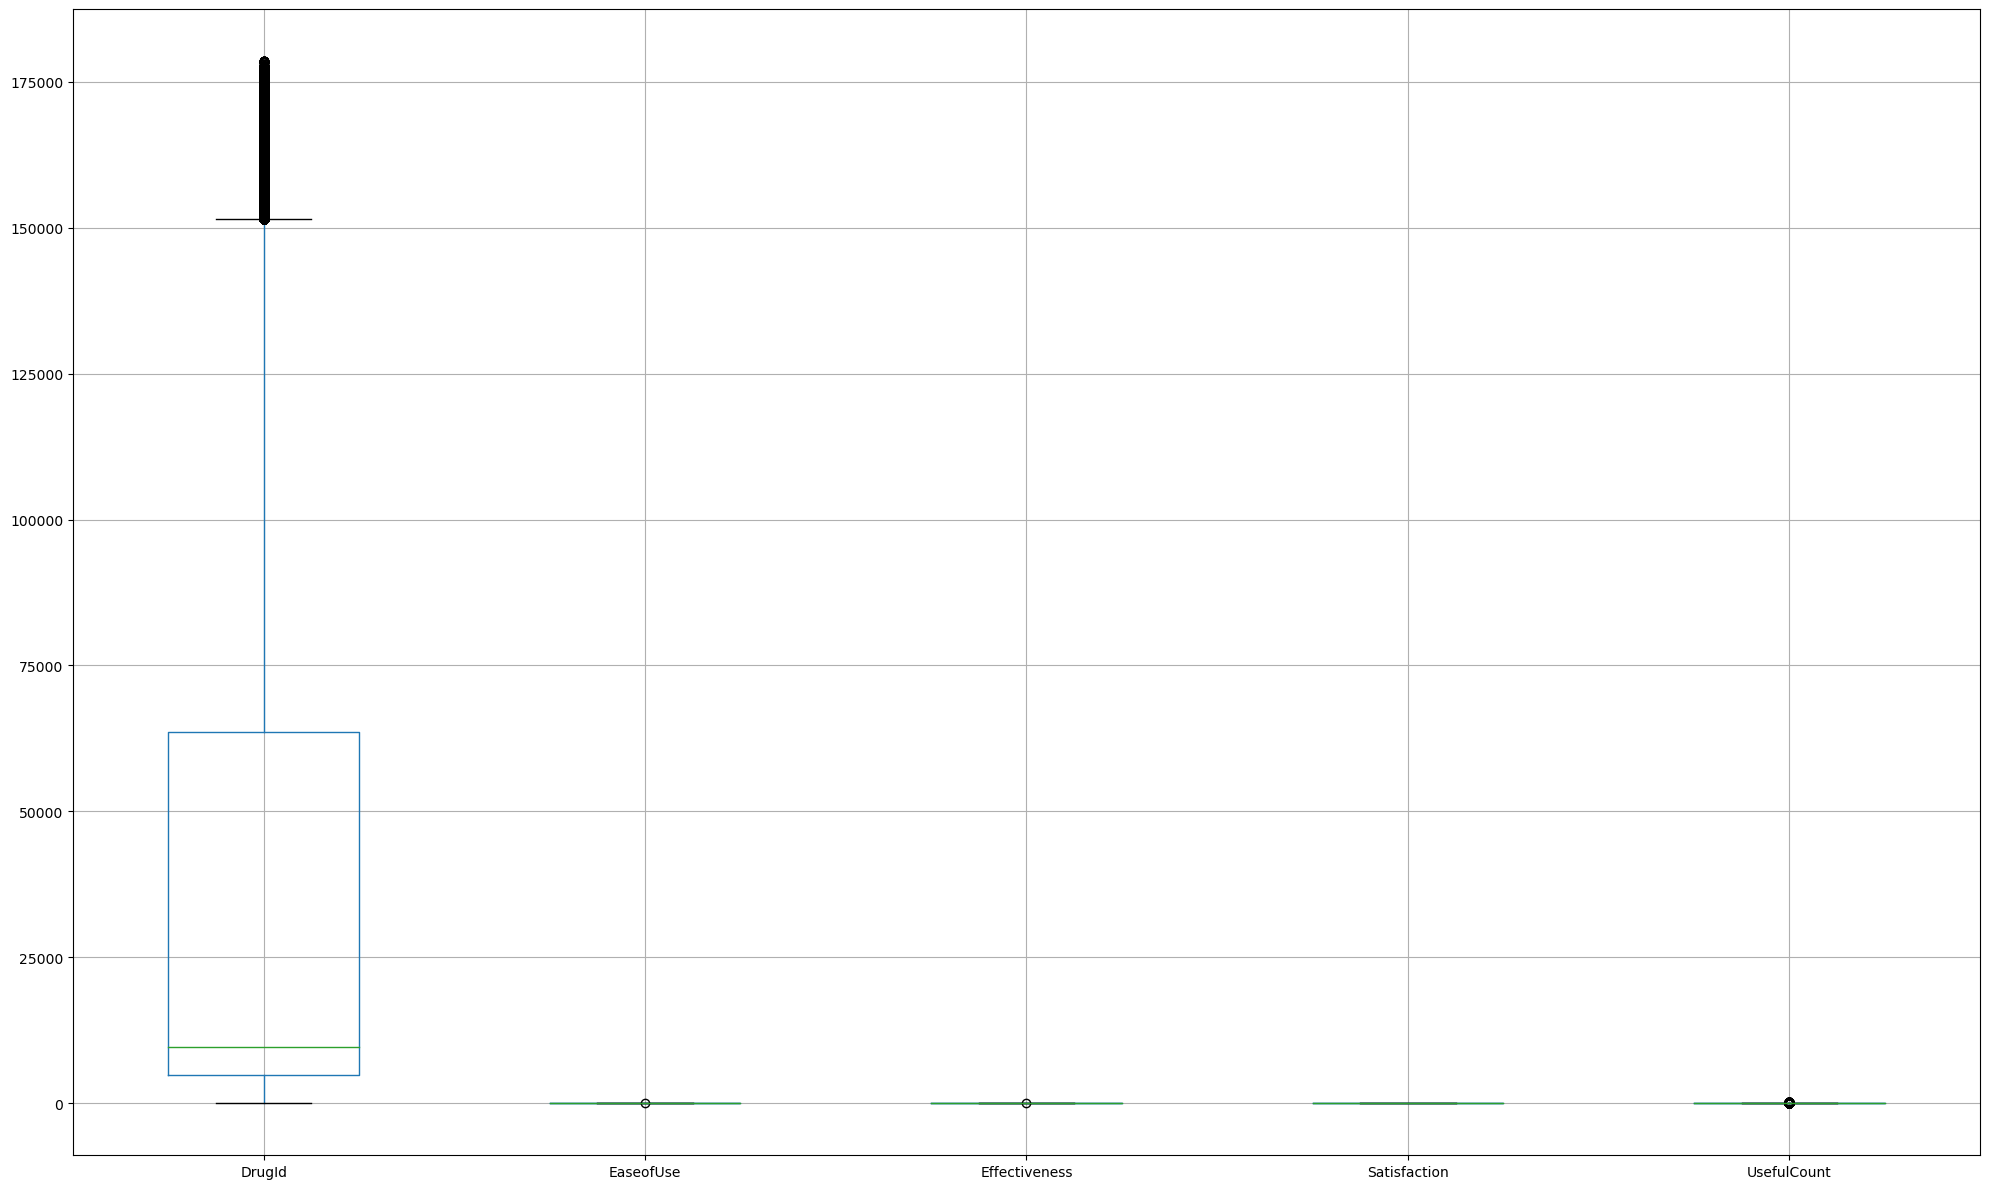

In [22]:
# Create box plots 
data1.boxplot(figsize=(20, 12))
plt.tight_layout()
plt.show()#it provide knowledge and understanding of the data also understanding the error in data as outliers

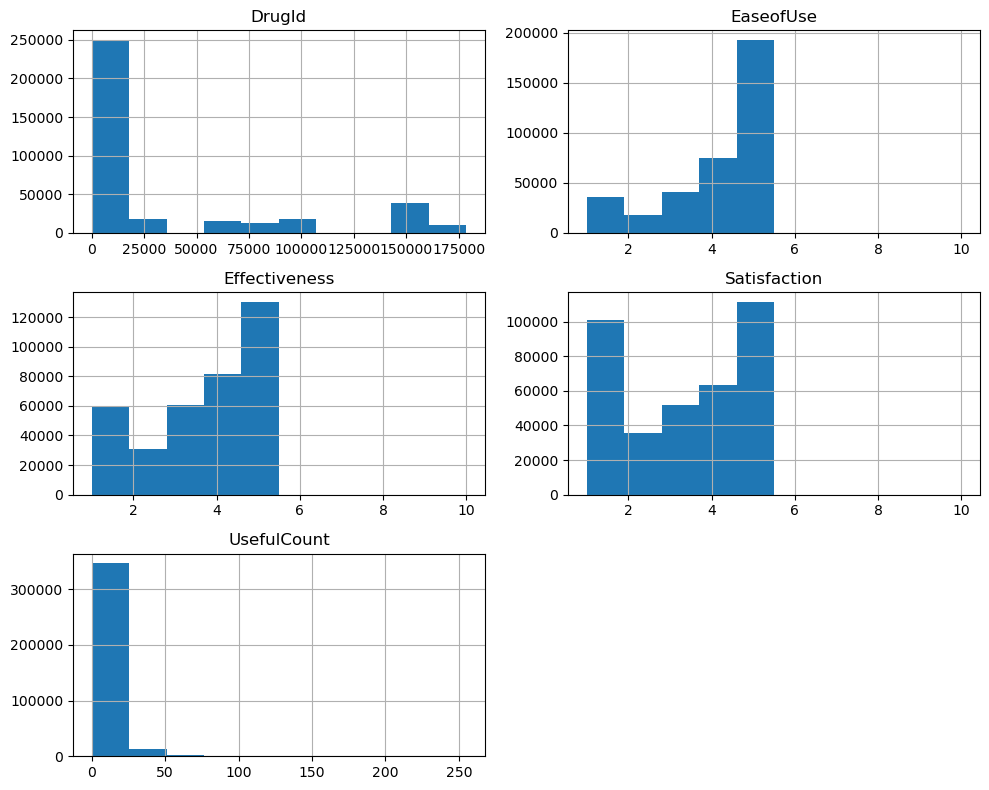

In [23]:
# Plot histograms for numerical variables
data1.hist(bins=10, figsize=(10, 8))
plt.tight_layout()
plt.show()#It allow us to identify the central tendency (mean, median) and the 
#presence of outliers,its a skewed histogram suggesting a non-normal distribution This information is valuable for understanding the data characteristics and potential insights it may provide.

### Top 20 Drugs based on No. of Users

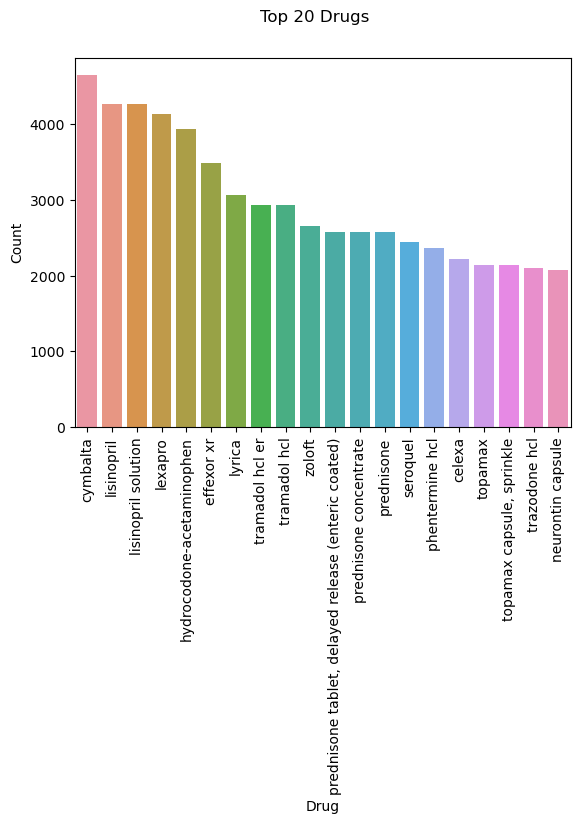

In [24]:
data_= data['Drug'].value_counts().head(20).reset_index()
data_.columns = ['Drug', 'Count']
sns.barplot(data=data_, x = 'Drug', y = 'Count')
plt.suptitle("Top 20 Drugs")
plt.xticks(rotation=90,fontsize=10)
plt.show()

#### Cymbalta tops the list followed by Lisinopril. It is to be noted that all the 20 drugs has been used by more than atleast 2000 people.

### Top 15 Conditions 

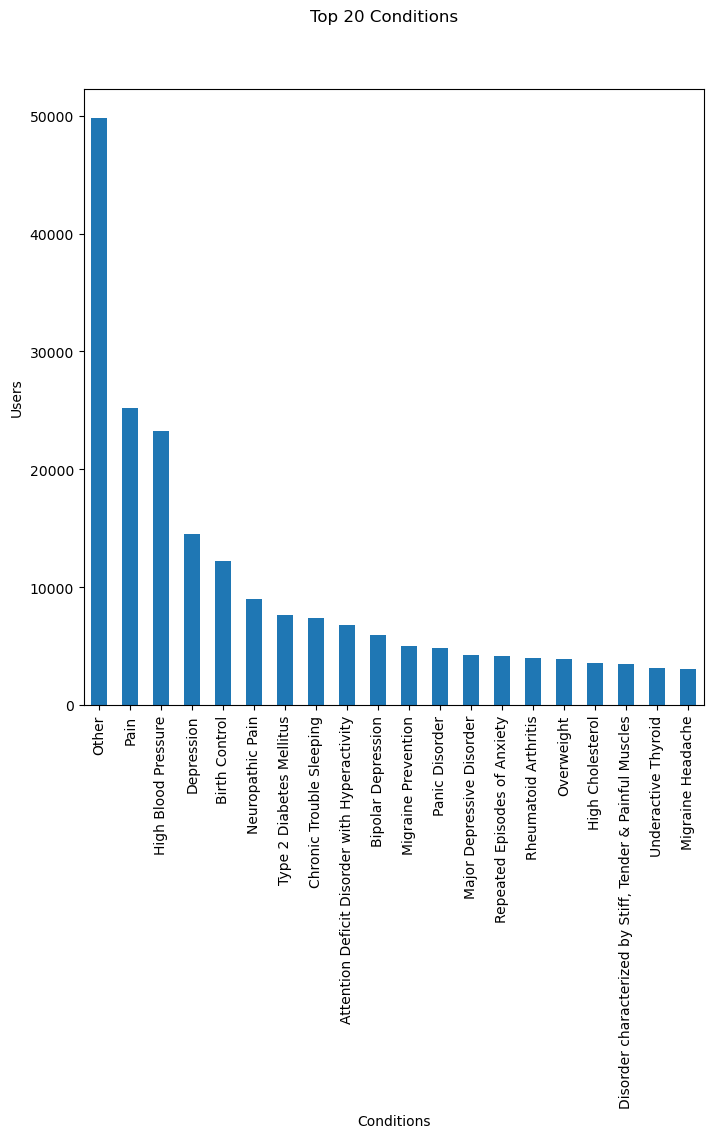

In [25]:
data['Condition'].value_counts().nlargest(20).plot(kind='bar',figsize=(8,8))
plt.suptitle("Top 20 Conditions")
plt.xlabel('Conditions')
plt.ylabel('Users')
plt.show()

#### As much as 50,000 users have reported other conditions followed by Pain topped the list with more than 25000 people reporting it.

### Which gender is the predominant user? 

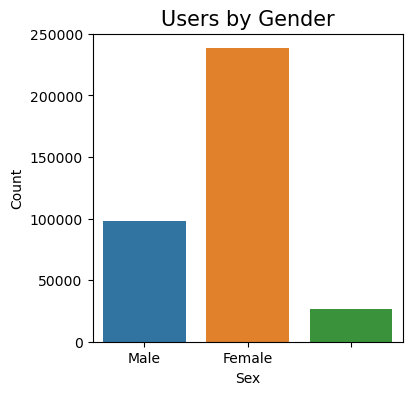

In [26]:
plt.figure(figsize = (4,4))
sns.countplot(x='Sex', data=data)
plt.title('Users by Gender', fontsize=15)
plt.xlabel('Sex')
plt.ylabel('Count') 
plt.show()

### Top 10 drugs with a 5-star rating for Satifaction

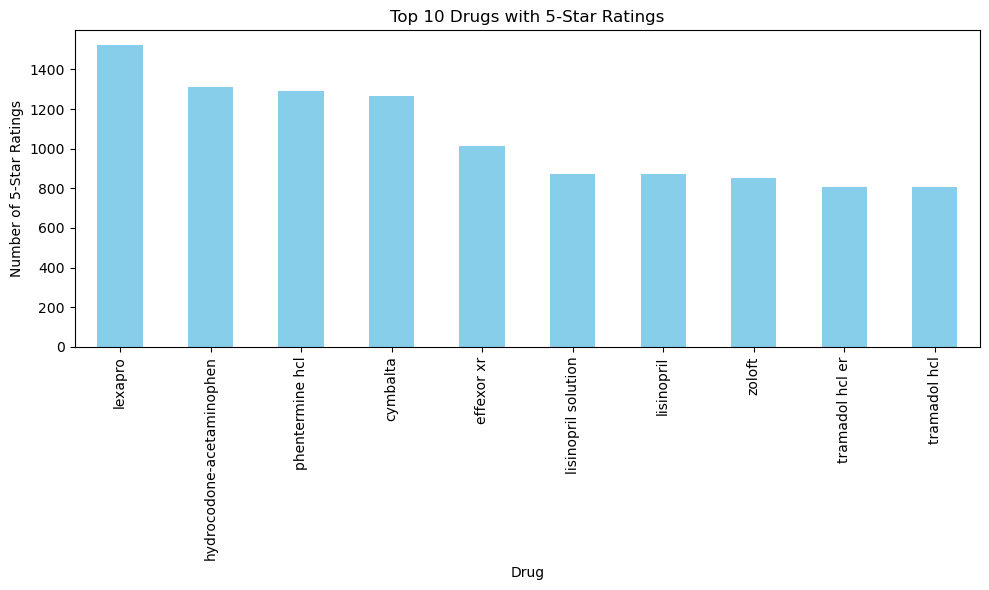

In [27]:
# Filter the dataset to select only rows with 5-star ratings
top_rated_data = data[data['Satisfaction'] == 5]

# Group the data by the 'Drug' column and count the occurrences
top_drugs = top_rated_data['Drug'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_drugs.plot(kind='bar', color='skyblue')
plt.xlabel('Drug')
plt.ylabel('Number of 5-Star Ratings')
plt.title('Top 10 Drugs with 5-Star Ratings')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

### Top 10 drugs with 5 star rating for Effectiveness

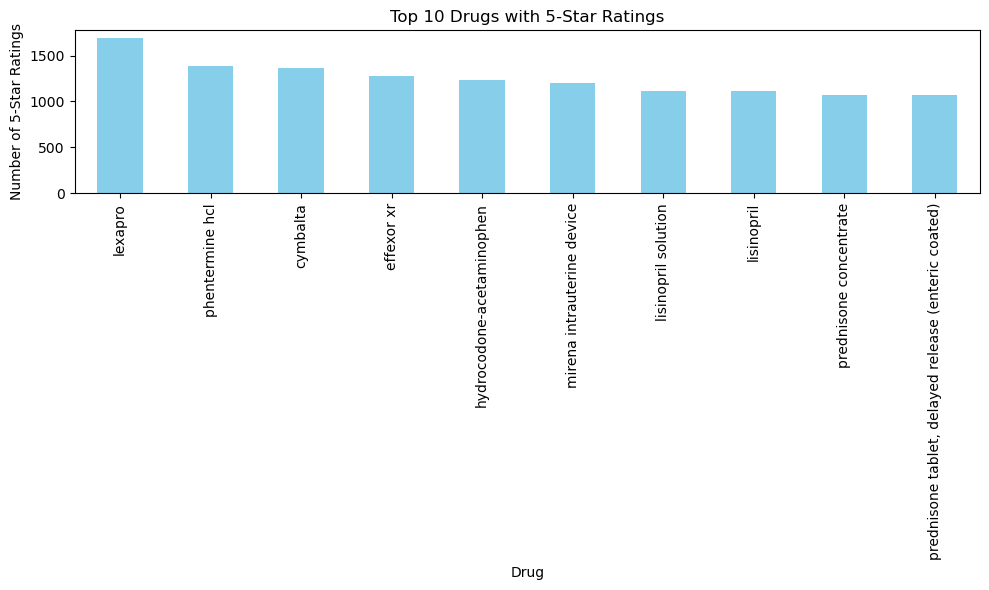

In [28]:
# Filter the dataset to select only rows with 5-star ratings
top_rated_effect = data[data['Effectiveness'] == 5]

# Group the data by the 'Drug' column and count the occurrences
top_drug_effect = top_rated_effect['Drug'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_drug_effect.plot(kind='bar', color='skyblue')
plt.xlabel('Drug')
plt.ylabel('Number of 5-Star Ratings')
plt.title('Top 10 Drugs with 5-Star Ratings')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

## A drug named Lisinopril solution with DrugId 6873 is selected in building a classification model to determine side effects

In [29]:
data2 = data1[data1.DrugId == 6873]

In [30]:
data2.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
9197,Troy,Asian,,High Blood Pressure,2/29/2020,lisinopril solution,6873,5,5,No Script or health Insurance needed to place ...,5,,"Dizziness , lightheadedness , tiredness, or ...",14
9203,Benito,Asian,75 or over,High Blood Pressure,2/8/2020,lisinopril solution,6873,5,4,I have developed a very itch rash on my body f...,4,Female,"Dizziness , lightheadedness , tiredness, or ...",3
9209,Theodore,White,55-64,High Blood Pressure,1/14/2020,lisinopril solution,6873,4,5,"tried alternative medicine Beet root, hibiscus...",4,Male,"Dizziness , lightheadedness , tiredness, or ...",3
9215,Jason,Hispanic,65-74,High Blood Pressure,10/17/2019,lisinopril solution,6873,5,5,Have been taking 10 mg doses per day for over ...,5,Male,"Dizziness , lightheadedness , tiredness, or ...",6
9221,Denny,White,55-64,High Blood Pressure,10/13/2019,lisinopril solution,6873,2,4,I don't like that I'm taking this and not know...,2,Male,"Dizziness , lightheadedness , tiredness, or ...",12


### Missing Value Handling

In [31]:
data2.dtypes

Name             object
Race             object
Age              object
Condition        object
Date             object
Drug             object
DrugId            int64
EaseofUse         int64
Effectiveness     int64
Reviews          object
Satisfaction      int64
Sex              object
Sides            object
UsefulCount       int64
dtype: object

In [32]:
# Handling instances with whitespaces
for i in data2:
    data2[i]=np.where(data2[i]==" ",np.NAN,data2[i])
    
data2.isna().sum()

Name                0
Race                0
Age               270
Condition           0
Date                0
Drug                0
DrugId              0
EaseofUse           0
Effectiveness       0
Reviews          1562
Satisfaction        0
Sex               494
Sides               0
UsefulCount         0
dtype: int64

In [33]:
data2.dropna(axis=0, inplace = True)
data2.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

### Checking each column values

In [34]:
data2.Sex.value_counts()

Female    4060
Male      2466
Name: Sex, dtype: int64

In [35]:
data2.Age.value_counts()

55-64         1912
45-54         1760
65-74         1148
35-44          858
75 or over     490
25-34          306
19-24           44
13-18            6
0-2              2
Name: Age, dtype: int64

In [36]:
data2['Year'] = pd.to_datetime(data2['Date'], errors='coerce').dt.year
data2['Month'] = pd.to_datetime(data2['Date'], errors='coerce').dt.month
data2['day_of_week'] = pd.to_datetime(data2['Date'], errors='coerce').dt.day_name()

In [37]:
data2.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Year,Month,day_of_week
9203,Benito,Asian,75 or over,High Blood Pressure,2/8/2020,lisinopril solution,6873.0,5.0,4.0,I have developed a very itch rash on my body f...,4.0,Female,"Dizziness , lightheadedness , tiredness, or ...",3.0,2020,2,Saturday
9209,Theodore,White,55-64,High Blood Pressure,1/14/2020,lisinopril solution,6873.0,4.0,5.0,"tried alternative medicine Beet root, hibiscus...",4.0,Male,"Dizziness , lightheadedness , tiredness, or ...",3.0,2020,1,Tuesday
9215,Jason,Hispanic,65-74,High Blood Pressure,10/17/2019,lisinopril solution,6873.0,5.0,5.0,Have been taking 10 mg doses per day for over ...,5.0,Male,"Dizziness , lightheadedness , tiredness, or ...",6.0,2019,10,Thursday
9221,Denny,White,55-64,High Blood Pressure,10/13/2019,lisinopril solution,6873.0,2.0,4.0,I don't like that I'm taking this and not know...,2.0,Male,"Dizziness , lightheadedness , tiredness, or ...",12.0,2019,10,Sunday
9227,Paris,Asian,55-64,High Blood Pressure,8/16/2019,lisinopril solution,6873.0,3.0,1.0,Was on this medicine for about 2 months and ha...,1.0,Female,"Dizziness , lightheadedness , tiredness, or ...",22.0,2019,8,Friday


### Which gender is the predominant user?

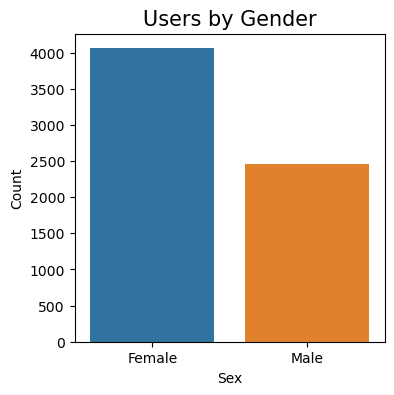

In [38]:
plt.figure(figsize = (4,4))
sns.countplot(x='Sex', data=data2)
plt.title('Users by Gender', fontsize=15)
plt.xlabel('Sex')
plt.ylabel('Count') 
plt.show()

#### Female users are predominant.

### Which race is the predominant user?

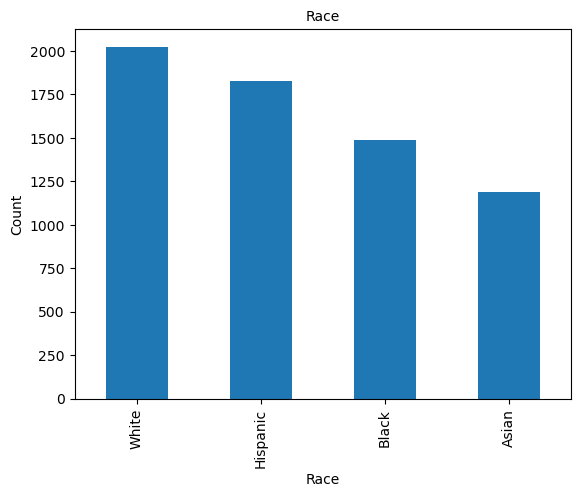

In [39]:
data2['Race'].value_counts().plot(kind='bar')
plt.title("Race", fontsize = 10)
plt.xlabel("Race", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.show()

### In each race, which gender is the predominant user?

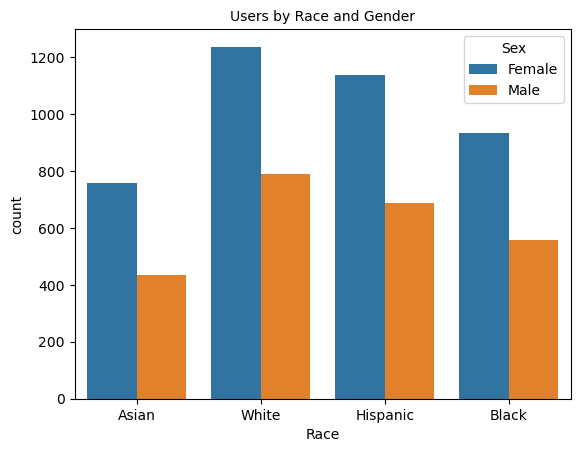

In [40]:
sns.countplot(x='Race',hue='Sex',data=data2)
plt.title("Users by Race and Gender", fontsize = 10)
plt.show()

### Which age group is the predominant user? 

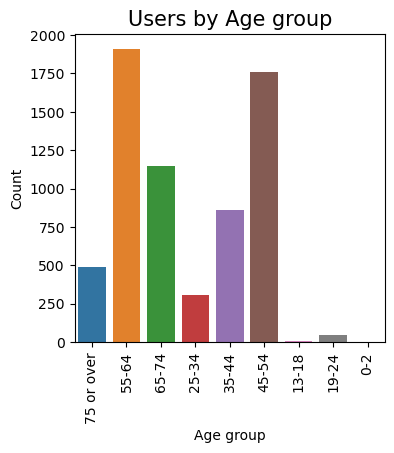

In [41]:
plt.figure(figsize = (4,4))
sns.countplot(x='Age', data=data2)
plt.title('Users by Age group', fontsize=15)
plt.xlabel('Age group')
plt.ylabel('Count') 
plt.xticks(rotation=90)
plt.show()

#### Age groups 55-64 are the predominant users.

### In each age group, which gender is the predominant user?

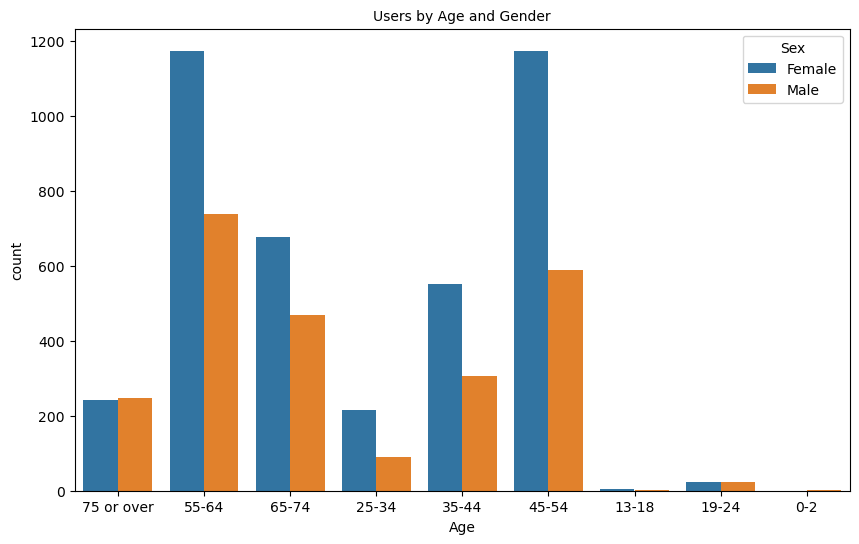

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='Sex',data=data2)
plt.title("Users by Age and Gender", fontsize = 10)
plt.show()

### In each year, how many reviews were collected? 

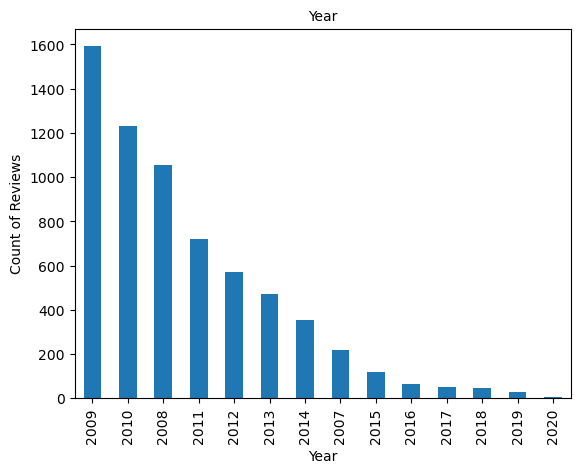

In [43]:
data2['Year'].value_counts().plot(kind='bar')
plt.title("Year", fontsize = 10)
plt.xlabel("Year", fontsize = 10)
plt.ylabel("Count of Reviews", fontsize = 10)
plt.show()

##### In each year, there is a gradual decrease in user reviews

### How effective is the drug?

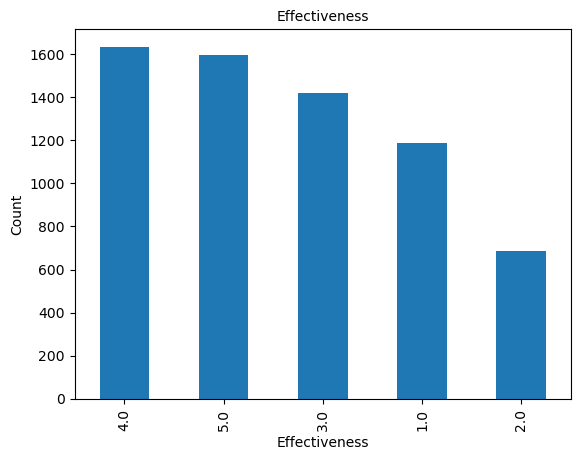

In [44]:
data2['Effectiveness'].value_counts().plot(kind='bar')
plt.title("Effectiveness", fontsize = 10)
plt.xlabel("Effectiveness", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.show()

##### The drug is fairly effective with around 1600 users voting a 4 rating to it.

### How effective is the drug among both the gender category?

<Figure size 1000x800 with 0 Axes>

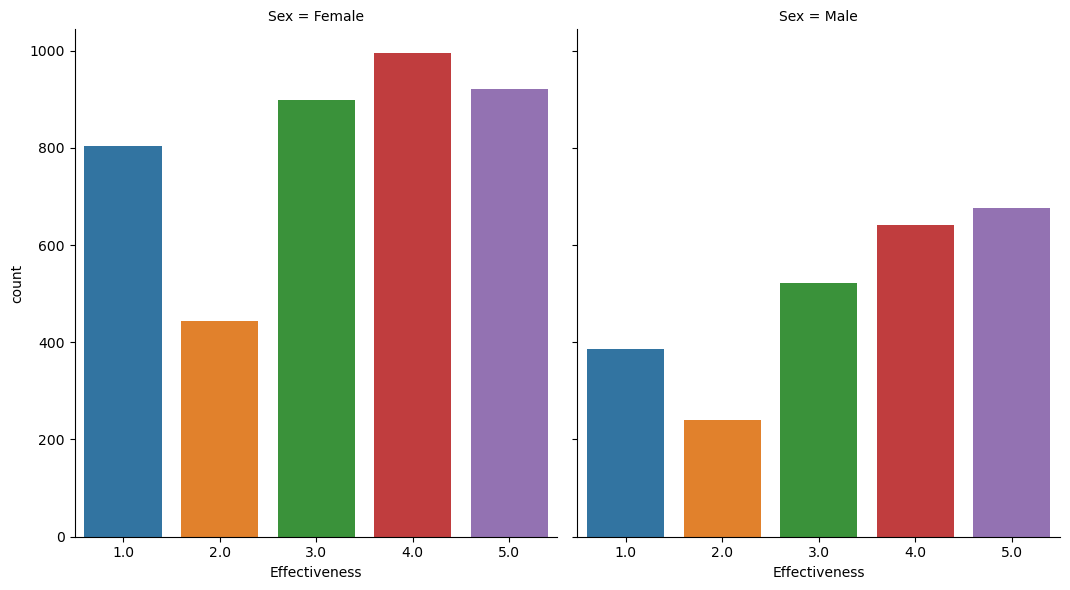

In [45]:
plt.figure(figsize=(10,8))
g = sns.catplot(x="Effectiveness",col="Sex",
                data=data2, kind="count",
                height=6,aspect =.9);
plt.show()

##### Both the users have given a mixed response.

### Pie Chart of Percentage of different conditions of People

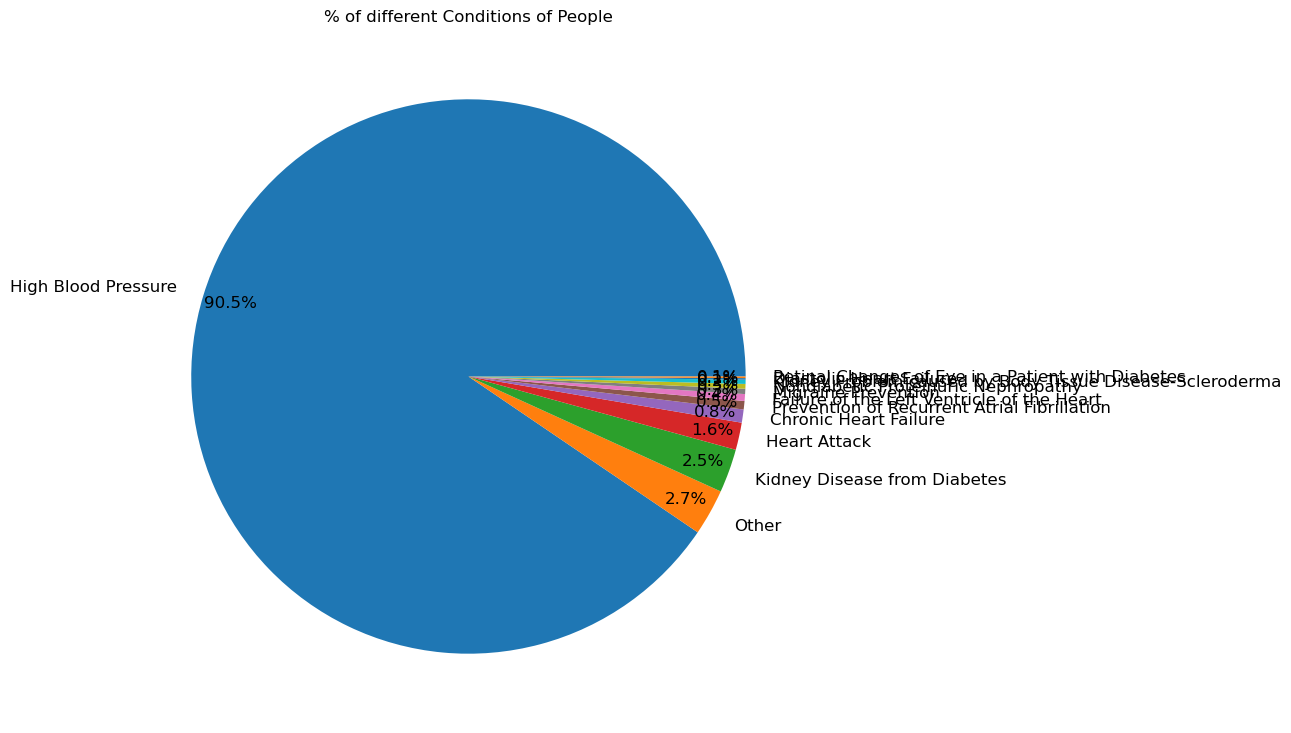

In [46]:
plt.figure(figsize=(15,9))
plt.title('% of different Conditions of People')
tr = pd.DataFrame(data2['Condition'].value_counts())
tr_names = tr.index
count = tr['Condition']
plt.style.use('ggplot')
plt.rc('font', size=12)
plt.pie(count, autopct='%1.1f%%', labels = tr_names, pctdistance=0.9, labeldistance=1.1)

plt.show()

## Top drug Cymbalt with drug id 91491 is taken for deatiled visualisation 

In [47]:
df = data1[data1.DrugId == 91491]

In [48]:
df.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
314212,Jazmine,White,,Major Depressive Disorder,2/29/2020,cymbalta,91491,5,5,No Script or health Insurance needed to place ...,5,,"Nausea , dry mouth , constipation , loss of ...",12
314216,Marcelino,Hispanic,45-54,Repeated Episodes of Anxiety,1/13/2020,cymbalta,91491,3,1,I was prescribed Cymbalta for anxiety and star...,1,Male,"Nausea , dry mouth , constipation , loss of ...",0
314223,Caron,Asian,45-54,Anxiousness associated with Depression,1/4/2020,cymbalta,91491,5,5,Switched from Effexor to this medicine after 1...,5,,"Nausea , dry mouth , constipation , loss of ...",0
314235,Jamey,Asian,35-44,Anxiousness associated with Depression,12/6/2019,cymbalta,91491,3,3,Bipolar I with a neck fusion. Pdoc prescribed ...,2,Female,"Nausea , dry mouth , constipation , loss of ...",0
314246,Quinn,Black,55-64,Chronic Muscle or Bone Pain,11/20/2019,cymbalta,91491,2,2,"I have depression, anxiety, Fibro, severe musc...",2,,"Nausea , dry mouth , constipation , loss of ...",1


In [49]:
df.shape

(4648, 14)

In [50]:
# Handling instances with whitespaces
for i in df:
    df[i]=np.where(df[i]==" ",np.NAN,df[i])
    
df.isna().sum()

Name               0
Race               0
Age              118
Condition          0
Date               0
Drug               0
DrugId             0
EaseofUse          0
Effectiveness      0
Reviews          502
Satisfaction       0
Sex              197
Sides              0
UsefulCount        0
dtype: int64

In [51]:
df.dropna(axis=0, inplace = True)
df.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

### How effective is the Cymbalta drug?

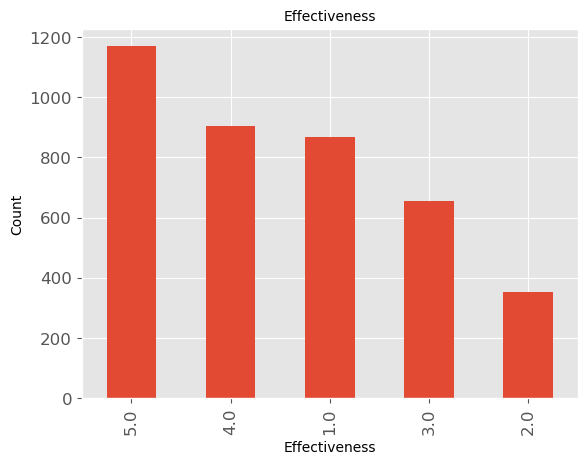

In [52]:
df['Effectiveness'].value_counts().plot(kind='bar')
plt.title("Effectiveness", fontsize = 10)
plt.xlabel("Effectiveness", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.show()

###### The drug is fairly effective with around 1100 users voting a 5 rating to it.

### How effective is the drug among both the gender category?

<Figure size 1000x800 with 0 Axes>

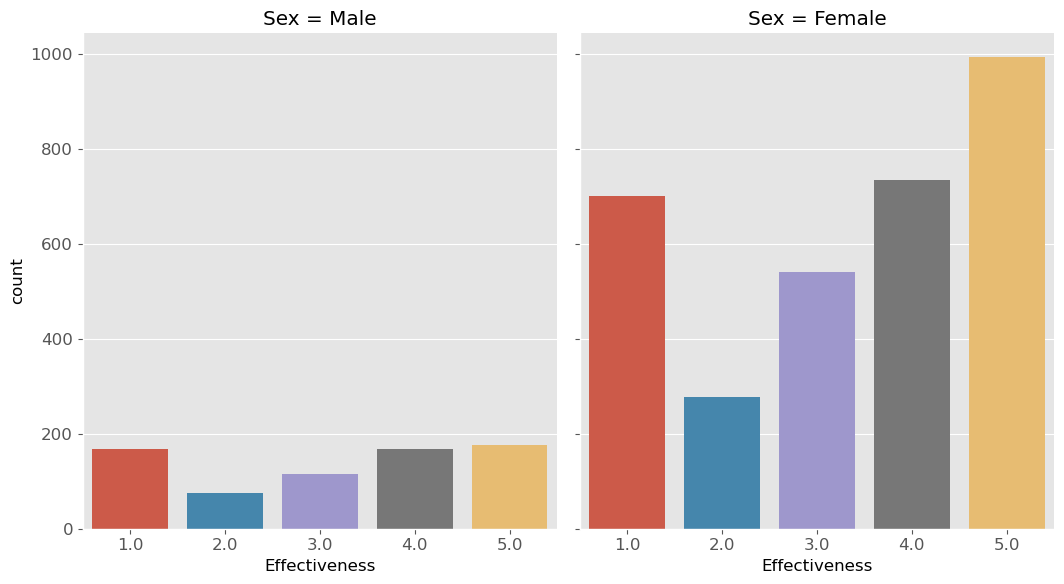

In [53]:
plt.figure(figsize=(10,8))
g = sns.catplot(x="Effectiveness",col="Sex",
                data=df, kind="count",
                height=6,aspect =.9);
plt.show()

##### Both the users have given a mixed response.

### In each age group, which gender is the predominant user of Cymbalta drug?

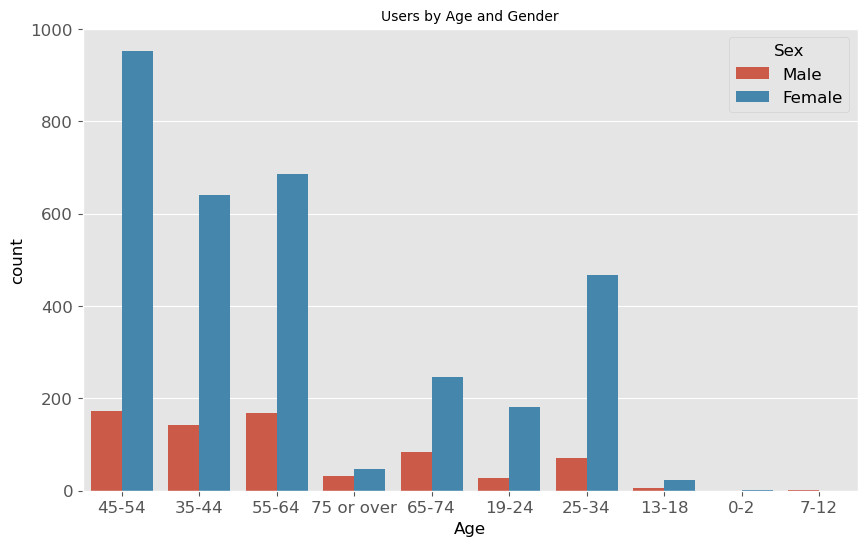

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='Sex',data=df)
plt.title("Users by Age and Gender", fontsize = 10)
plt.show()

### Which gender is the predominant user?

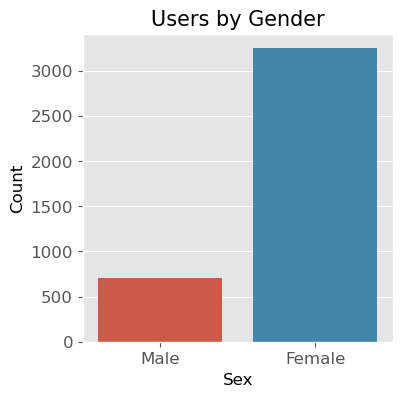

In [55]:
plt.figure(figsize = (4,4))
s=sns.countplot(x='Sex', data=df)
plt.title('Users by Gender', fontsize=15)
plt.xlabel('Sex')
plt.ylabel('Count') 
plt.show()

##### Female users are predominant